## Introduction
Banks face credit risk when lending to customers who may default on their obligations.
This project develops a Probability of Default (PD) model to support credit risk
assessment and data-driven loan approval decisions.


## Data Overview

In [1]:
import pandas as pd

df = pd.read_excel("default of credit card clients.xls", header=1)
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [2]:
df.shape

(30000, 25)

In [3]:
df["default payment next month"].value_counts(normalize=True)

default payment next month
0    0.7788
1    0.2212
Name: proportion, dtype: float64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

In [5]:
df.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


## Exploratory Data Analysis

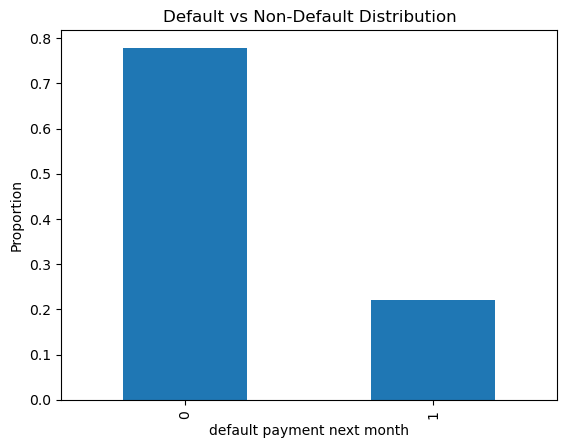

In [6]:
import matplotlib.pyplot as plt

df["default payment next month"].value_counts(normalize=True).plot(
    kind="bar",
    title="Default vs Non-Default Distribution"
)
plt.ylabel("Proportion")
plt.show()

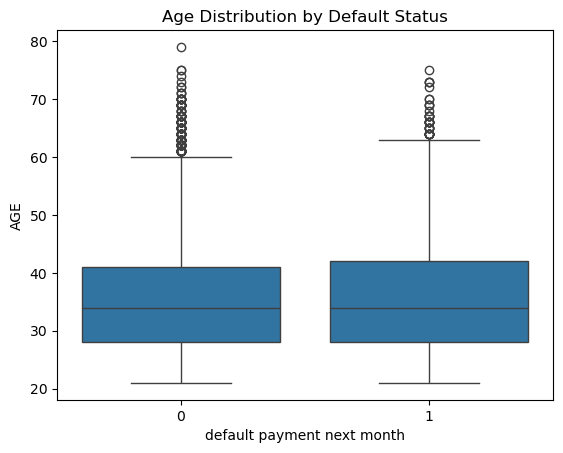

In [7]:
import seaborn as sns

sns.boxplot(
    x="default payment next month",
    y="AGE",
    data=df
)
plt.title("Age Distribution by Default Status")
plt.show()

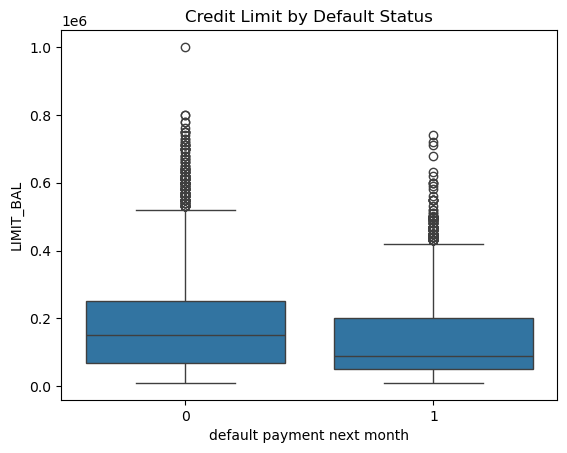

In [8]:
sns.boxplot(
    x="default payment next month",
    y="LIMIT_BAL",
    data=df
)
plt.title("Credit Limit by Default Status")
plt.show()

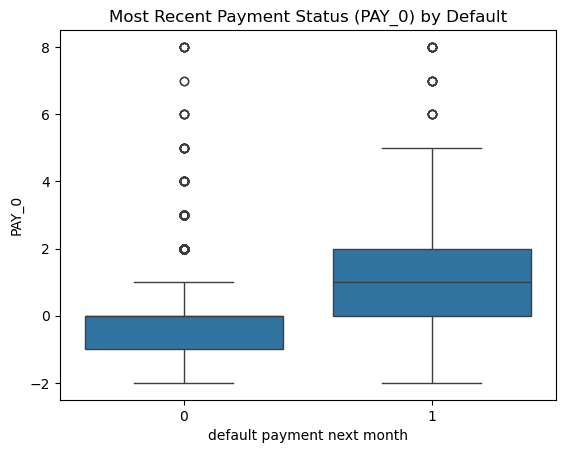

In [9]:
sns.boxplot(
    x="default payment next month",
    y="PAY_0",
    data=df
)
plt.title("Most Recent Payment Status (PAY_0) by Default")
plt.show()

Exploratory analysis shows that repayment behaviour variables are the strongest indicators of default risk. Customers with recent payment delays exhibit significantly higher default rates. Credit limits and age provide additional context but are less predictive on their own. These findings align with real-world credit risk principles, where behavioural data is central to default prediction.

## Feature Engineering

In [10]:
#Separate target variable and features
X = df.drop(columns=["default payment next month", "ID"])
y = df["default payment next month"]

In [11]:
#Handle categorical variables
cat_cols = ["SEX", "EDUCATION", "MARRIAGE"]

X = pd.get_dummies(X, columns=cat_cols, drop_first=True)

## Model Building (Logistic Regression)

In [12]:
#Train-Test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.3,
    random_state=42,
    stratify=y
)

In [13]:
#Scale numerical features
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [14]:
#Train the model
from sklearn.linear_model import LogisticRegression

log_model = LogisticRegression(
    max_iter=1000,
    solver="lbfgs"
)

log_model.fit(X_train_scaled, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


## Model Evaluation

In [15]:
from sklearn.metrics import roc_auc_score

y_pred_proba = log_model.predict_proba(X_test_scaled)[:, 1]

roc_auc = roc_auc_score(y_test, y_pred_proba)
roc_auc

0.7162653900033387

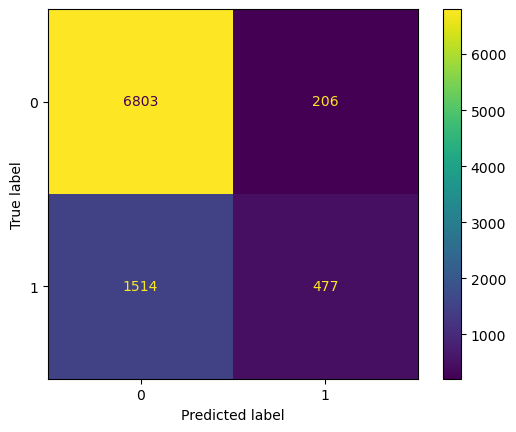

In [16]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, log_model.predict(X_test_scaled))

ConfusionMatrixDisplay(cm).plot()

In [17]:
from sklearn.metrics import classification_report

print(classification_report(y_test, log_model.predict(X_test_scaled)))

              precision    recall  f1-score   support

           0       0.82      0.97      0.89      7009
           1       0.70      0.24      0.36      1991

    accuracy                           0.81      9000
   macro avg       0.76      0.61      0.62      9000
weighted avg       0.79      0.81      0.77      9000



## Feature Importance

In [18]:
import numpy as np

feature_importance = pd.DataFrame({
    "feature": X.columns,
    "coefficient": log_model.coef_[0]
})

feature_importance["abs_coef"] = np.abs(feature_importance["coefficient"])
feature_importance.sort_values("abs_coef", ascending=False).head(10)

,feature,coefficient,abs_coef
2,PAY_0,0.653604,0.653604
27,MARRIAGE_1,0.479864,0.479864
28,MARRIAGE_2,0.379979,0.379979
8,BILL_AMT1,-0.330832,0.330832
15,PAY_AMT2,-0.253925,0.253925
21,EDUCATION_1,0.211269,0.211269
22,EDUCATION_2,0.160194,0.160194
14,PAY_AMT1,-0.154631,0.154631
0,LIMIT_BAL,-0.108782,0.108782
23,EDUCATION_3,0.107929,0.107929


## Business Interpretation

The Probability of Default model provides a quantitative measure of credit risk that can support loan approval decisions. Customers with recent payment delays exhibit significantly higher predicted default probabilities, confirming the importance of behavioural data in credit risk assessment.

Adjusting the decision threshold allows the bank to trade off between reducing credit losses and maintaining portfolio growth. A conservative threshold reduces defaults but may reject profitable customers, while a lenient threshold increases risk exposure.

## Limitations & Improvements

This analysis is based on historical customer data and may not fully capture changes in customer behaviour over time. The dataset also lacks detailed income and employment information, which could improve risk prediction.

Future improvements could include incorporating additional behavioural data, testing alternative models, and validating the model on more recent or external datasets.